# Regresión Lineal
## Introducción
### ¿Que es Regresión Lineal?

Es un método estadístico que estudia la relación lineal que existen entre dos variables, este consiste en generar un modelo de regresión (ecuación de una recta) que permita explicar la relación lineal. A la variable dependiente o respuesta se le identifica como “Y” y a la variable predictora o independiente como “X”. $$Y = ax + b$$

[Referencia Regresión Lineal](http://eio.usc.es/eipc1/BASE/BASEMASTER/FORMULARIOS-PHP-DPTO/MATERIALES/Mat_50140116_Regr_%20simple_2011_12.pdf)



### Historia de la Regresión Lineal

El término regresión fue intorudcido por Francis Galton en su libro natural inheritance (1889). Su trabajo se centrón en la descripción de los rasgos físicos de los desendientes (Variable A) a partir de los de sus padres (Variable B). Estudiando la altura de padres e hijos a partir de más de mil registros de grupos familiares, se llegó a la conclución de que los padres muy altos tenían una tendencia a tener hijos que heredan parte de esa altura, pero que revelaban también una tendencia a regresar a la media. Galton generalizó esa tendencia bajo la "ley de la regresión universal": Cada peculiaridad en un hombre es compartida por sus descendientes, pero en media, en un grado menor. [Referencia 1](https://prezi.com/qpxysldecq4u/regresion-lineal/?frame=a79f2ee2b8f615172c242610bdb24735781bcf9f)
    

![Francis Galton](C:\Users\cgiraldo\Downloads/francis-galton.jpg)

Desde el punto de vista de la Estadística matemática se puede considerar a Galton como un
ingenioso amateur, ya que, sin conocer los refinados métodos estadísticos de la época (usados, por
ejemplo, por Laplace y Gauss) y por medio de investigaciones empíricas, estudia la variabilidad de
características humanas. Desarrolla sus propios y rudimentarios métodos para describir observaciones
univariadas y bivariadas normalmente distribuidas, explicando la utilidad y el significado de la
regresión y correlación, no solamente en el contexto de la herencia, sino en general. Galton no conocía
la literatura estadística germana y para ajustar una distribución normal a sus datos utiliza el método de
Quetelet, muy simple desde el punto de vista numérico, ya que, requiere solamente el cálculo de
frecuencias relativas y la interpolación en la tabla de la binomial acumulativa. Como no domina con
soltura la matemática de su tiempo utiliza artificios mecánicos para “probar” las propiedades de la
distribución binomial como el que llamó “quincux”, hoy conocido como aparato de Galton. [Referencia 2](https://core.ac.uk/download/pdf/20343739.pdf)

<img src=>

## Planteamiento del Algoritmo

Se tiene una base de datos de estudiantes y se quiere verificar de los 920 estudiantes que se matricularon en el primer periodo del año 2016 cuando siguen matriculados hasta el segundo periodo del año 2020, esto para la ciudad de Bogotá.

In [3]:
import pandas as pd

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')
counties=pd.read_excel("gdrive/My Drive/Colab Notebooks/Detalle Estudiantes.xlsx")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
counties

,Sede,Grado,ID Estudiante,Cohorte,1620,1710,1720,1810,1820,1910,1920,2010,2020,cohorte
0,Bogotá,Pregrado,Estudiante 1,1610,Matr.,Matr.,Matr.,Matr.,Matr.,Matr.,Matr.,Grad.,Grad.,1610
1,Bogotá,Pregrado,Estudiante 2,1610,Matr.,Matr.,Matr.,Matr.,Matr.,Matr.,Matr.,Grad.,Grad.,1610
2,Bogotá,Pregrado,Estudiante 3,1610,Matr.,Matr.,Aus.,Dsr.,Dsr.,Dsr.,Dsr.,Dsr.,Dsr.,1610
3,Bogotá,Pregrado,Estudiante 4,1610,Matr.,Matr.,Matr.,Matr.,Matr.,Matr.,Matr.,Grad.,Grad.,1610
4,Bogotá,Pregrado,Estudiante 5,1610,Aus.,Rng.,Matr.,Matr.,Aus.,Dsr.,Dsr.,Dsr.,Dsr.,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9018,Bogotá,Pregrado,Estudiante 9019,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matr.,1610
9019,Bogotá,Pregrado,Estudiante 9020,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matr.,1610
9020,Bogotá,Pregrado,Estudiante 9021,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matr.,1610
9021,Bogotá,Pregrado,Estudiante 9022,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Matr.,1610


In [28]:
counties.columns

Index([         'Sede',         'Grado', 'ID Estudiante',       'Cohorte',
                  1620,            1710,            1720,            1810,
                  1820,            1910,            1920,            2010,
                  2020,       'cohorte'],
      dtype='object')

In [35]:
counties['Cohorte'] < 1620

0       True
1       True
2       True
3       True
4       True
        ... 
9018    True
9019    True
9020    True
9021    True
9022    True
Name: Cohorte, Length: 9023, dtype: bool

In [37]:
cohorte = counties[counties['Cohorte'] < 1620]
cohorte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9023 entries, 0 to 9022
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sede           9023 non-null   object
 1   Grado          9023 non-null   object
 2   ID Estudiante  9023 non-null   object
 3   Cohorte        9023 non-null   int64 
 4   1620           1190 non-null   object
 5   1710           2386 non-null   object
 6   1720           3671 non-null   object
 7   1810           4739 non-null   object
 8   1820           5719 non-null   object
 9   1910           6467 non-null   object
 10  1920           7469 non-null   object
 11  2010           8173 non-null   object
 12  2020           9023 non-null   object
 13  cohorte        9023 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 1.0+ MB


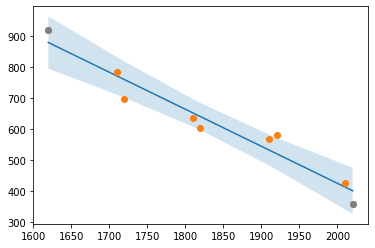

In [48]:
import matplotlib.pyplot as plt
import numpy as np
# Periodo 1620 = Segundo Periodo del año 2016, 1710 = Primer Periodo del año 2017
x_train = np.array([1620,1710,1720,1810,1820,1910,1920,2010,2020])
x_val = np.array([1620,2020])

y_train = np.array([920,782,695,635,602,568,579,424,358])
y_val = np.array([920,358])

a,b = np.polyfit(x_train, y_train, deg=1)
y_est = a * x_train + b
y_err = x_train.std() * np.sqrt(1/len(x_train) + (x_train - x_train.mean())**2 / np.sum ((x_train - x_train.mean())**2))

fig, ax = plt.subplots()
ax.plot(x_train,y_est, '-')
ax.fill_between(x_train, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x_train,y_train, 'o', color='tab:orange')
ax.plot(x_val, y_val, 'o', color='tab:gray')

plt.show()


## Conclusiones

En el ejercicio se verifica que los datos se encuentran dentro de las bandas, para este modelo si funciona, hay que resaltas que este solo me muestra la cantidad de estudiantes para cada periodo

### Realizado Por : Ingeniero Camilo Esteban Giraldo